In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from datetime import datetime as dt
from copy import deepcopy
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from attacks import fgsm, pgd
from utils import clean_acc, adv_acc, print_table
from trainer import Trainer, plot_history
from model import Small
from layers import *

1.7.0
True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = torch.seed()
print(f"seed: {seed}")
torch.manual_seed(seed)

cuda
seed: 2766852856296835201


In [4]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

batch_size = (100, 400)
train_dl = DataLoader(ds_train, batch_size=batch_size[0], shuffle=True)
test_dl = DataLoader(ds_test, batch_size=batch_size[1], shuffle=True)

iter_on_batch = len(train_dl)
print(f"iter_on_batch: {iter_on_batch}")

iter_on_batch: 600


## eps 0.005 co 50 epok
## kappa schodzi do 1/2 w 1 epoce

In [5]:
from hyperparam_scheduler import LinearScheduler

kappa_scheduler = LinearScheduler(start=1, end=0.5)
kappa_scheduler.calc_coefficient(-0.5, 1, iter_on_batch)

eps_scheduler = LinearScheduler(start=0)
eps_scheduler.calc_coefficient(0.005, 50, iter_on_batch)

cuda
epoch start with: eps: 0.00000000, kappa: 1.00000000
function: _train_test_epoch took: 0:01:03
function: _train_test_epoch took: 0:00:02
Epoch: 1 Validation Loss: 0.1474 accuracy: 0.9579, robust err: 0.0708

epoch start with: eps: 0.00010000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:03
function: _train_test_epoch took: 0:00:01
Epoch: 2 Validation Loss: 0.1015 accuracy: 0.9731, robust err: 0.0505

epoch start with: eps: 0.00020000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 3 Validation Loss: 0.0858 accuracy: 0.9781, robust err: 0.0435

epoch start with: eps: 0.00030000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 4 Validation Loss: 0.0821 accuracy: 0.9804, robust err: 0.0418

epoch start with: eps: 0.00040000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 5 Validation Loss: 

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 40 Validation Loss: 0.1810 accuracy: 0.9830, robust err: 0.0774

epoch start with: eps: 0.00400000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 41 Validation Loss: 0.1812 accuracy: 0.9828, robust err: 0.0787

epoch start with: eps: 0.00410000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 42 Validation Loss: 0.1843 accuracy: 0.9831, robust err: 0.0790

epoch start with: eps: 0.00420000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 43 Validation Loss: 0.1877 accuracy: 0.9830, robust err: 0.0806

epoch start with: eps: 0.00430000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:02
Epoch: 44 Validation Loss: 0.1889 accuracy: 0.9828, robust err: 0.0812

epoch st

function: _train_test_epoch took: 0:00:01
Epoch: 79 Validation Loss: 0.2429 accuracy: 0.9816, robust err: 0.1028

epoch start with: eps: 0.00790000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 80 Validation Loss: 0.2449 accuracy: 0.9810, robust err: 0.1027

epoch start with: eps: 0.00800000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 81 Validation Loss: 0.2450 accuracy: 0.9813, robust err: 0.1033

epoch start with: eps: 0.00810000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 82 Validation Loss: 0.2460 accuracy: 0.9810, robust err: 0.1038

epoch start with: eps: 0.00820000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 83 Validation Loss: 0.2465 accuracy: 0.9814, robust err: 0.1033

epoch start with: eps: 0.00830000, kappa: 0.500000

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 119 Validation Loss: 0.2881 accuracy: 0.9802, robust err: 0.1159

epoch start with: eps: 0.01190000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 120 Validation Loss: 0.2884 accuracy: 0.9804, robust err: 0.1148

epoch start with: eps: 0.01200000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 121 Validation Loss: 0.2904 accuracy: 0.9798, robust err: 0.1165

epoch start with: eps: 0.01210000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 122 Validation Loss: 0.2925 accuracy: 0.9803, robust err: 0.1168

epoch start with: eps: 0.01220000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 123 Validation Loss: 0.2923 accuracy: 0.9794, robust err: 0.1162

epo

function: _train_test_epoch took: 0:00:02
Epoch: 158 Validation Loss: 0.3389 accuracy: 0.9784, robust err: 0.1229

epoch start with: eps: 0.01580000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 159 Validation Loss: 0.3406 accuracy: 0.9782, robust err: 0.1227

epoch start with: eps: 0.01590000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 160 Validation Loss: 0.3406 accuracy: 0.9787, robust err: 0.1224

epoch start with: eps: 0.01600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 161 Validation Loss: 0.3425 accuracy: 0.9789, robust err: 0.1222

epoch start with: eps: 0.01610000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 162 Validation Loss: 0.3464 accuracy: 0.9784, robust err: 0.1242

epoch start with: eps: 0.01620000, kappa: 0.5

function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 200 Validation Loss: 0.4046 accuracy: 0.9773, robust err: 0.1325

epoch start with: eps: 0.02000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 201 Validation Loss: 0.4063 accuracy: 0.9775, robust err: 0.1332

epoch start with: eps: 0.02010000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 202 Validation Loss: 0.4102 accuracy: 0.9773, robust err: 0.1326

epoch start with: eps: 0.02020000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 203 Validation Loss: 0.4112 accuracy: 0.9773, robust err: 0.1341

epoch start with: eps: 0.02030000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 204 Validation Loss: 0.4115 accuracy: 0.9772, robust err: 0.1322

epo

function: _train_test_epoch took: 0:00:02
Epoch: 239 Validation Loss: 0.4693 accuracy: 0.9767, robust err: 0.1383

epoch start with: eps: 0.02390000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 240 Validation Loss: 0.4760 accuracy: 0.9771, robust err: 0.1375

epoch start with: eps: 0.02400000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 241 Validation Loss: 0.4765 accuracy: 0.9768, robust err: 0.1401

epoch start with: eps: 0.02410000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 242 Validation Loss: 0.4730 accuracy: 0.9772, robust err: 0.1366

epoch start with: eps: 0.02420000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 243 Validation Loss: 0.4768 accuracy: 0.9768, robust err: 0.1379

epoch start with: eps: 0.02430000, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 279 Validation Loss: 0.5512 accuracy: 0.9768, robust err: 0.1435

epoch start with: eps: 0.02790000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 280 Validation Loss: 0.5503 accuracy: 0.9770, robust err: 0.1419

epoch start with: eps: 0.02800000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 281 Validation Loss: 0.5527 accuracy: 0.9770, robust err: 0.1407

epoch start with: eps: 0.02810000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 282 Validation Loss: 0.5538 accuracy: 0.9763, robust err: 0.1425

epoch start with: eps: 0.02820000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 283 Validation Loss: 0.5561 accuracy: 0.9761, robust err: 0.1436

epo

function: _train_test_epoch took: 0:00:02
Epoch: 318 Validation Loss: 0.6178 accuracy: 0.9762, robust err: 0.1455

epoch start with: eps: 0.03180000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 319 Validation Loss: 0.6215 accuracy: 0.9761, robust err: 0.1467

epoch start with: eps: 0.03190000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 320 Validation Loss: 0.6262 accuracy: 0.9755, robust err: 0.1487

epoch start with: eps: 0.03200000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 321 Validation Loss: 0.6218 accuracy: 0.9767, robust err: 0.1466

epoch start with: eps: 0.03210000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 322 Validation Loss: 0.6172 accuracy: 0.9773, robust err: 0.1412

epoch start with: eps: 0.03220000, kappa: 0.5

function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 358 Validation Loss: 0.6695 accuracy: 0.9752, robust err: 0.1484

epoch start with: eps: 0.03580000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 359 Validation Loss: 0.6701 accuracy: 0.9763, robust err: 0.1504

epoch start with: eps: 0.03590000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 360 Validation Loss: 0.6798 accuracy: 0.9762, robust err: 0.1532

epoch start with: eps: 0.03600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 361 Validation Loss: 0.6732 accuracy: 0.9767, robust err: 0.1482

epoch start with: eps: 0.03610000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 362 Validation Loss: 0.6781 accuracy: 0.9761, robust err: 0.1496

epo

function: _train_test_epoch took: 0:00:02
Epoch: 397 Validation Loss: 0.7496 accuracy: 0.9746, robust err: 0.1552

epoch start with: eps: 0.03970000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:02
Epoch: 398 Validation Loss: 0.7451 accuracy: 0.9759, robust err: 0.1512

epoch start with: eps: 0.03980000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 399 Validation Loss: 0.7605 accuracy: 0.9761, robust err: 0.1577

epoch start with: eps: 0.03990000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 400 Validation Loss: 0.7547 accuracy: 0.9768, robust err: 0.1529

epoch start with: eps: 0.04000000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 401 Validation Loss: 0.7572 accuracy: 0.9756, robust err: 0.1518

epoch start with: eps: 0.04010000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 437 Validation Loss: 0.8144 accuracy: 0.9762, robust err: 0.1580

epoch start with: eps: 0.04370000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 438 Validation Loss: 0.8140 accuracy: 0.9741, robust err: 0.1544

epoch start with: eps: 0.04380000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 439 Validation Loss: 0.8146 accuracy: 0.9763, robust err: 0.1553

epoch start with: eps: 0.04390000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 440 Validation Loss: 0.8245 accuracy: 0.9745, robust err: 0.1547

epoch start with: eps: 0.04400000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 441 Validation Loss: 0.8231 accuracy: 0.9743, robust err: 0.1581

epo

function: _train_test_epoch took: 0:00:02
Epoch: 476 Validation Loss: 0.8641 accuracy: 0.9742, robust err: 0.1619

epoch start with: eps: 0.04760000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 477 Validation Loss: 0.8575 accuracy: 0.9739, robust err: 0.1574

epoch start with: eps: 0.04770000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 478 Validation Loss: 0.8563 accuracy: 0.9748, robust err: 0.1608

epoch start with: eps: 0.04780000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 479 Validation Loss: 0.8492 accuracy: 0.9744, robust err: 0.1573

epoch start with: eps: 0.04790000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 480 Validation Loss: 0.8490 accuracy: 0.9747, robust err: 0.1579

epoch start with: eps: 0.04800000, kappa: 0.5

function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 516 Validation Loss: 0.8710 accuracy: 0.9725, robust err: 0.1679

epoch start with: eps: 0.05160000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 517 Validation Loss: 0.8494 accuracy: 0.9750, robust err: 0.1614

epoch start with: eps: 0.05170000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 518 Validation Loss: 0.8618 accuracy: 0.9729, robust err: 0.1631

epoch start with: eps: 0.05180000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 519 Validation Loss: 0.8462 accuracy: 0.9753, robust err: 0.1559

epoch start with: eps: 0.05190000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 520 Validation Loss: 0.8499 accuracy: 0.9746, robust err: 0.1644

epo

function: _train_test_epoch took: 0:00:02
Epoch: 555 Validation Loss: 0.8279 accuracy: 0.9730, robust err: 0.1672

epoch start with: eps: 0.05550000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 556 Validation Loss: 0.8286 accuracy: 0.9721, robust err: 0.1630

epoch start with: eps: 0.05560000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 557 Validation Loss: 0.8229 accuracy: 0.9729, robust err: 0.1639

epoch start with: eps: 0.05570000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 558 Validation Loss: 0.8337 accuracy: 0.9711, robust err: 0.1676

epoch start with: eps: 0.05580000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 559 Validation Loss: 0.8349 accuracy: 0.9711, robust err: 0.1633

epoch start with: eps: 0.05590000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 595 Validation Loss: 0.8331 accuracy: 0.9710, robust err: 0.1706

epoch start with: eps: 0.05950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 596 Validation Loss: 0.8336 accuracy: 0.9708, robust err: 0.1725

epoch start with: eps: 0.05960000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 597 Validation Loss: 0.8373 accuracy: 0.9722, robust err: 0.1751

epoch start with: eps: 0.05970000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 598 Validation Loss: 0.8296 accuracy: 0.9722, robust err: 0.1717

epoch start with: eps: 0.05980000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 599 Validation Loss: 0.8220 accuracy: 0.9730, robust err: 0.1619

epo

function: _train_test_epoch took: 0:00:02
Epoch: 634 Validation Loss: 0.7964 accuracy: 0.9708, robust err: 0.1680

epoch start with: eps: 0.06340000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 635 Validation Loss: 0.7987 accuracy: 0.9717, robust err: 0.1726

epoch start with: eps: 0.06350000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 636 Validation Loss: 0.7833 accuracy: 0.9713, robust err: 0.1650

epoch start with: eps: 0.06360000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 637 Validation Loss: 0.7908 accuracy: 0.9718, robust err: 0.1657

epoch start with: eps: 0.06370000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 638 Validation Loss: 0.8010 accuracy: 0.9733, robust err: 0.1695

epoch start with: eps: 0.06380000, kappa: 0.5

function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 674 Validation Loss: 0.7779 accuracy: 0.9722, robust err: 0.1691

epoch start with: eps: 0.06740000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 675 Validation Loss: 0.7772 accuracy: 0.9733, robust err: 0.1610

epoch start with: eps: 0.06750000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 676 Validation Loss: 0.7833 accuracy: 0.9726, robust err: 0.1691

epoch start with: eps: 0.06760000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 677 Validation Loss: 0.7952 accuracy: 0.9706, robust err: 0.1693

epoch start with: eps: 0.06770000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 678 Validation Loss: 0.7813 accuracy: 0.9712, robust err: 0.1701

epo

function: _train_test_epoch took: 0:00:02
Epoch: 713 Validation Loss: 0.7701 accuracy: 0.9704, robust err: 0.1739

epoch start with: eps: 0.07130000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 714 Validation Loss: 0.7643 accuracy: 0.9702, robust err: 0.1771

epoch start with: eps: 0.07140000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 715 Validation Loss: 0.7610 accuracy: 0.9710, robust err: 0.1695

epoch start with: eps: 0.07150000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 716 Validation Loss: 0.7471 accuracy: 0.9739, robust err: 0.1675

epoch start with: eps: 0.07160000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 717 Validation Loss: 0.7593 accuracy: 0.9694, robust err: 0.1758

epoch start with: eps: 0.07170000, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 753 Validation Loss: 0.6969 accuracy: 0.9713, robust err: 0.1797

epoch start with: eps: 0.07530000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 754 Validation Loss: 0.6767 accuracy: 0.9712, robust err: 0.1732

epoch start with: eps: 0.07540000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 755 Validation Loss: 0.6730 accuracy: 0.9714, robust err: 0.1685

epoch start with: eps: 0.07550000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 756 Validation Loss: 0.6644 accuracy: 0.9722, robust err: 0.1586

epoch start with: eps: 0.07560000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 757 Validation Loss: 0.6667 accuracy: 0.9705, robust err: 0.1699

epo

function: _train_test_epoch took: 0:00:01
Epoch: 792 Validation Loss: 0.6553 accuracy: 0.9699, robust err: 0.1723

epoch start with: eps: 0.07920000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 793 Validation Loss: 0.6544 accuracy: 0.9702, robust err: 0.1686

epoch start with: eps: 0.07930000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 794 Validation Loss: 0.6507 accuracy: 0.9723, robust err: 0.1646

epoch start with: eps: 0.07940000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 795 Validation Loss: 0.6777 accuracy: 0.9686, robust err: 0.1829

epoch start with: eps: 0.07950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 796 Validation Loss: 0.6636 accuracy: 0.9715, robust err: 0.1749

epoch start with: eps: 0.07960000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 832 Validation Loss: 0.6628 accuracy: 0.9704, robust err: 0.1677

epoch start with: eps: 0.08320000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 833 Validation Loss: 0.6806 accuracy: 0.9693, robust err: 0.1795

epoch start with: eps: 0.08330000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 834 Validation Loss: 0.6648 accuracy: 0.9689, robust err: 0.1745

epoch start with: eps: 0.08340000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 835 Validation Loss: 0.6720 accuracy: 0.9717, robust err: 0.1681

epoch start with: eps: 0.08350000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 836 Validation Loss: 0.6598 accuracy: 0.9714, robust err: 0.1727

epo

function: _train_test_epoch took: 0:00:01
Epoch: 871 Validation Loss: 0.6984 accuracy: 0.9686, robust err: 0.1842

epoch start with: eps: 0.08710000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 872 Validation Loss: 0.6727 accuracy: 0.9684, robust err: 0.1791

epoch start with: eps: 0.08720000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 873 Validation Loss: 0.6775 accuracy: 0.9706, robust err: 0.1759

epoch start with: eps: 0.08730000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 874 Validation Loss: 0.6780 accuracy: 0.9716, robust err: 0.1834

epoch start with: eps: 0.08740000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 875 Validation Loss: 0.6678 accuracy: 0.9681, robust err: 0.1760

epoch start with: eps: 0.08750000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 911 Validation Loss: 0.6634 accuracy: 0.9687, robust err: 0.1818

epoch start with: eps: 0.09110000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 912 Validation Loss: 0.6876 accuracy: 0.9680, robust err: 0.1918

epoch start with: eps: 0.09120000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 913 Validation Loss: 0.6832 accuracy: 0.9652, robust err: 0.1879

epoch start with: eps: 0.09130000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 914 Validation Loss: 0.6652 accuracy: 0.9685, robust err: 0.1801

epoch start with: eps: 0.09140000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 915 Validation Loss: 0.6575 accuracy: 0.9696, robust err: 0.1751

epo

function: _train_test_epoch took: 0:00:02
Epoch: 950 Validation Loss: 0.6370 accuracy: 0.9664, robust err: 0.1813

epoch start with: eps: 0.09500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 951 Validation Loss: 0.6424 accuracy: 0.9675, robust err: 0.1829

epoch start with: eps: 0.09510000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 952 Validation Loss: 0.6482 accuracy: 0.9667, robust err: 0.1876

epoch start with: eps: 0.09520000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 953 Validation Loss: 0.6311 accuracy: 0.9673, robust err: 0.1770

epoch start with: eps: 0.09530000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 954 Validation Loss: 0.6227 accuracy: 0.9686, robust err: 0.1723

epoch start with: eps: 0.09540000, kappa: 0.5

function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 990 Validation Loss: 0.6473 accuracy: 0.9663, robust err: 0.1842

epoch start with: eps: 0.09900000, kappa: 0.50000000
function: _train_test_epoch took: 0:02:06
function: _train_test_epoch took: 0:00:03
Epoch: 991 Validation Loss: 0.6378 accuracy: 0.9717, robust err: 0.1796

epoch start with: eps: 0.09910000, kappa: 0.50000000
function: _train_test_epoch took: 0:06:14
function: _train_test_epoch took: 0:00:09
Epoch: 992 Validation Loss: 0.6779 accuracy: 0.9645, robust err: 0.2004

epoch start with: eps: 0.09920000, kappa: 0.50000000
function: _train_test_epoch took: 0:08:26
function: _train_test_epoch took: 0:00:09
Epoch: 993 Validation Loss: 0.6558 accuracy: 0.9689, robust err: 0.2033

epoch start with: eps: 0.09930000, kappa: 0.50000000
function: _train_test_epoch took: 0:08:10
function: _train_test_epoch took: 0:00:07
Epoch: 994 Validation Loss: 0.6468 accuracy: 0.9691, robust err: 0.1868

epo

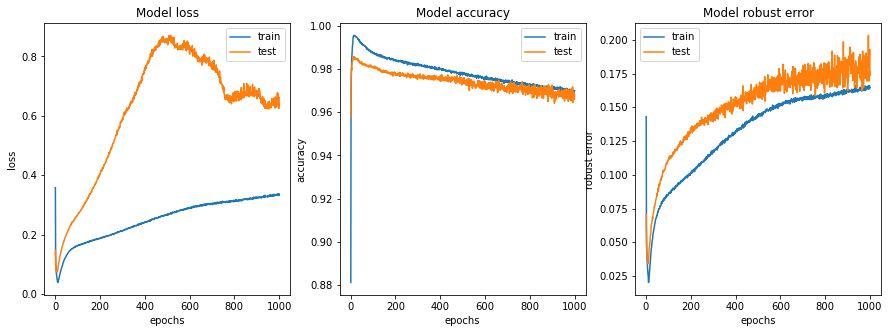

In [6]:
model_name = "mnist_small_0_005_exp4"


trainer = Trainer(model_name, train_dl, test_dl, eps_scheduler, kappa_scheduler, checkpoint=10)
model = Small()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-4,
                                                 patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=1000)
plot_history(model_name, history)

In [7]:
print(f"max eps: {eps_scheduler.current}")

max eps: 0.09999999999939992


In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = MNIST('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 400, shuffle=True)


def create_attack(eps, alpha, num_iter):
    d = {
        "epsilon": eps,
        "alpha": alpha,
        "num_iter": num_iter
    }
    return f"e={eps:.1f},a={alpha:.1f},i={num_iter}", d
    

attack1 = create_attack(eps=0.1, alpha=0.1, num_iter=30)
attack2 = create_attack(eps=0.2, alpha=0.1, num_iter=30)
attack3 = create_attack(eps=0.3, alpha=0.1, num_iter=30)
attack4 = create_attack(eps=0.4, alpha=0.1, num_iter=30)

params = [attack1, attack2, attack3, attack4]

In [9]:
model_name = "mnist_small_0_005_exp4"

In [10]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_10.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9846                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5905           
name: e=0.2,a=0.1,i=30 accuracy: 0.0012           
name: e=0.3,a=0.1,i=30 accuracy: 0.0000           
name: e=0.4,a=0.1,i=30 accuracy: 0.0000           


In [11]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_100.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9807                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7344           
name: e=0.2,a=0.1,i=30 accuracy: 0.0164           
name: e=0.3,a=0.1,i=30 accuracy: 0.0033           
name: e=0.4,a=0.1,i=30 accuracy: 0.0026           


In [12]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_200.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9773                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7695           
name: e=0.2,a=0.1,i=30 accuracy: 0.0729           
name: e=0.3,a=0.1,i=30 accuracy: 0.0517           
name: e=0.4,a=0.1,i=30 accuracy: 0.0496           


In [13]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_300.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9774                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7741           
name: e=0.2,a=0.1,i=30 accuracy: 0.0906           
name: e=0.3,a=0.1,i=30 accuracy: 0.0674           
name: e=0.4,a=0.1,i=30 accuracy: 0.0638           


In [14]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_400.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9768                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7693           
name: e=0.2,a=0.1,i=30 accuracy: 0.0970           
name: e=0.3,a=0.1,i=30 accuracy: 0.0676           
name: e=0.4,a=0.1,i=30 accuracy: 0.0661           


In [15]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_500.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9747                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7548           
name: e=0.2,a=0.1,i=30 accuracy: 0.0855           
name: e=0.3,a=0.1,i=30 accuracy: 0.0486           
name: e=0.4,a=0.1,i=30 accuracy: 0.0486           


In [16]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_600.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9744                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7664           
name: e=0.2,a=0.1,i=30 accuracy: 0.0822           
name: e=0.3,a=0.1,i=30 accuracy: 0.0477           
name: e=0.4,a=0.1,i=30 accuracy: 0.0479           


In [17]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_700.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9722                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7460           
name: e=0.2,a=0.1,i=30 accuracy: 0.0546           
name: e=0.3,a=0.1,i=30 accuracy: 0.0218           
name: e=0.4,a=0.1,i=30 accuracy: 0.0200           


In [18]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_800.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9705                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7136           
name: e=0.2,a=0.1,i=30 accuracy: 0.0747           
name: e=0.3,a=0.1,i=30 accuracy: 0.0516           
name: e=0.4,a=0.1,i=30 accuracy: 0.0507           


In [19]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_900.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9725                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6923           
name: e=0.2,a=0.1,i=30 accuracy: 0.0976           
name: e=0.3,a=0.1,i=30 accuracy: 0.0834           
name: e=0.4,a=0.1,i=30 accuracy: 0.0812           


In [20]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_1000.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9682                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6625           
name: e=0.2,a=0.1,i=30 accuracy: 0.1599           
name: e=0.3,a=0.1,i=30 accuracy: 0.1505           
name: e=0.4,a=0.1,i=30 accuracy: 0.1470           
